#Fisher Linear Discriminant
#Difference Matrix
#Auto Encoders

In [1]:
from BcomMEG import *
import matplotlib.pyplot as plt

In [2]:
dir = '/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT'
dir1 = '/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/Data_Sample'
subjects = ['BCOM_18_2', 'BCOM_18_3', 'BCOM_18_4']
picks = None

data = BcomMEG(dir=dir1, subjects=subjects, picks=picks, avoid_reading=False)

Reading /Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/Data_Sample/BCOM_18_2_ma_32-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/Data_Sample/BCOM_18_2_i_16-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/Data_Sample/BCOM_18_2_me_34-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/ciprianb

In [14]:
list(data.data.keys())

['BCOM_18_2', 'BCOM_18_3', 'BCOM_18_4']

In [3]:
trial_1 = data.get_trial(['BCOM_18_2'])

In [7]:
for subject in trial_1.data:
    print(subject)

BCOM_18_2


In [9]:
trial_1.data

{'BCOM_18_2': {'ma_32': array([[[-4.79506083e-13, -3.29101384e-13, -4.34727558e-13, ...,
           -1.81659971e-13, -2.13038761e-13, -2.52562511e-13],
          [-4.84898851e-13, -3.41391493e-13, -3.28622573e-13, ...,
           -2.13401033e-13, -2.11496958e-13, -2.47110709e-13],
          [-1.25867808e-13,  9.41294755e-15, -1.73537793e-13, ...,
           -1.51553385e-13, -2.29496083e-13, -1.70158280e-13],
          ...,
          [ 4.62308414e-13,  3.07903984e-13,  2.94050130e-13, ...,
           -5.98844542e-13, -7.44338022e-13, -4.57054425e-13],
          [ 5.53706278e-13,  5.25755871e-13,  4.74466278e-13, ...,
           -1.01613618e-12, -1.18418079e-12, -8.43976310e-13],
          [ 5.00336697e-13,  6.16956844e-13,  5.18404384e-13, ...,
           -1.09032249e-12, -1.22118732e-12, -9.28830689e-13]],
  
         [[-1.87060667e-13, -2.21121624e-13, -2.54475802e-13, ...,
           -2.65532279e-13, -2.11930937e-13, -2.03124694e-13],
          [-1.16118012e-13, -1.61819505e-13, -9.7

In [11]:
trial_1_averages = {syllable: np.array([]) for syllable in trial_1.data['BCOM_18_2']}
bcom18_2 = trial_1.data['BCOM_18_2']
for syllable in bcom18_2:
    trial_1_averages[syllable] = np.mean(trial_1.data['BCOM_18_2'][syllable], axis=0)

In [65]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

flattened = np.array([trial_1_averages[syllable].ravel() for syllable in trial_1_averages.keys()])
correlation_distance = squareform(pdist(flattened, metric='euclidean'))
    



In [ ]:
print("Correlation Distance Matrix:")
print(correlation_distance)

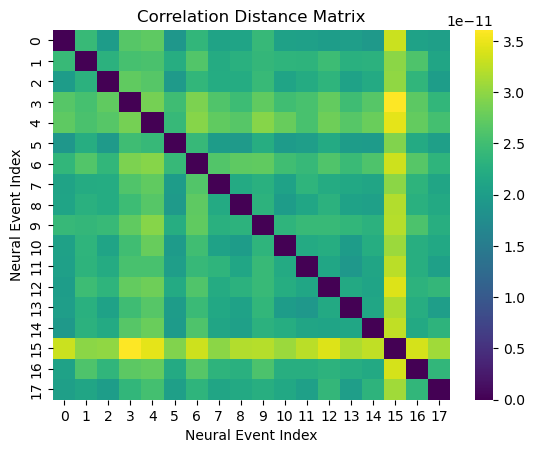

In [67]:
sns.heatmap(correlation_distance, annot=False, cmap='viridis')
plt.title("Correlation Distance Matrix")
plt.xlabel("Neural Event Index")
plt.ylabel("Neural Event Index")
plt.show()

In [71]:
list(trial_1_averages.keys())[15]

'se_54'

In [77]:
trial_1_averages_array = np.array([trial_1_averages[syllable] for syllable in trial_1_averages.keys()])
frobenius_distance = np.zeros((18, 18))

for i in range(18):
    for j in range(18):
        frobenius_distance[i, j] = np.linalg.norm(trial_1_averages_array[i] - trial_1_averages_array[j], ord='fro')

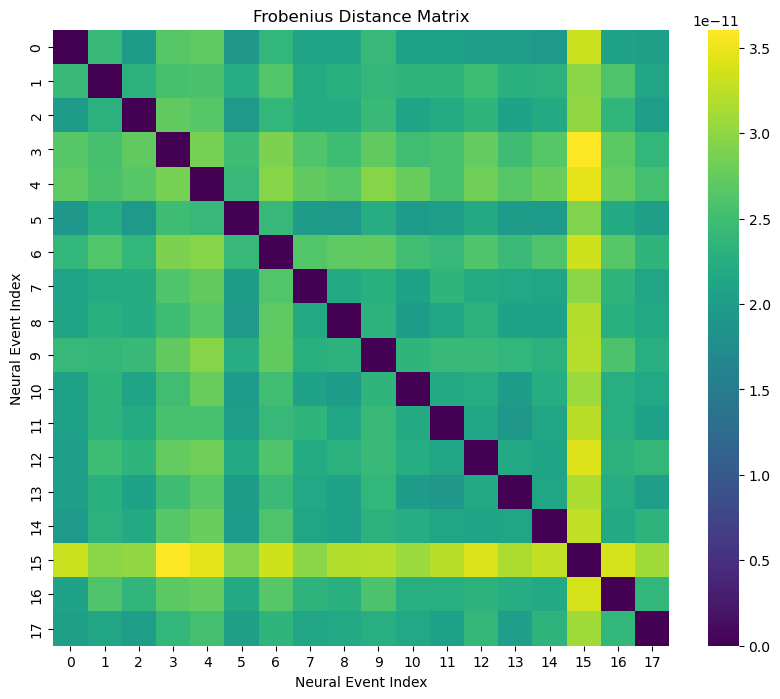

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(frobenius_distance, annot=False, cmap='viridis', square=True, cbar=True)
plt.title("Frobenius Distance Matrix")
plt.xlabel("Neural Event Index")
plt.ylabel("Neural Event Index")
plt.show()
 